# 第 15 章 统计分析

**本章内容提要**:

- 数据的概括性度量
- 统计分布
- 假设检验

统计学是关于认识客观现象总体数量特征和数量关系的科学。一些常见的概念早已深入到生活的各个方面，如求和、求均值、相关性等。不同的领域中统计分析的重要性不太一样。不管怎样，掌握基础的统计分析方法是有必要的。本章将介绍一些描述性统计、统计分布和假设检验的基本理论和在 Python 中的实现。

## 15.1 概括性度量

对于两组数据，我们常常无法通过一对一的比较来得出它们的关系（如大或小）。为了了解和比较数据的分布情况，我们需要提取数据分布的特征。我们一般从三个方面对数据分布的特征进行描述：

- 分布的集中趋势：反映了数据点向其中心值聚集的程度。
- 分布的离散程度：反映了数据点远离中心值的程度。
- 分布的形状：反映数据分布偏斜的程度和峰度。

接下来逐一介绍它们，我们依旧使用 mtcars 数据集进行探究，先导入需要的库和数据。

In [3]:
import statistics as st # 标准库
import numpy as np
import pandas as pd
mtcars = pd.read_csv('files/chapter11/mtcars.csv')

### 15.1.1 集中趋势的度量

集中趋势反映了一组数据中心点的所在位置。不同的数据类型使用的集中趋势度量不同。

- 分类数据：众数
- 顺序数据：中位数、众数
- 数值数据：均值（平均数）、中位数、众数

Python 标准库、NumPy 库和 Pandas 库都有计算实现。

#### 均值

均值反映总体的一般水平，有算数平均数、几何平均数等几种类型。

算数平均数最为常用，它是一组数据总和与数量的比值。

In [6]:
st.mean([1, 2, 3])  # 标准库计算
np.mean([1, 2, 3])  # NumPy 库计算
pd.Series([1, 2, 3]).mean()  # Pandas 库计算

2.0

几何平均数又称为对数平均数，它是若干项值连乘积开其项数次方的算术根，常用于计算当各数据值的连乘积等于总比率或总速度时的平均比率或平均速度，如计算投资的年利率。如果数据存在 0 值，几何平均数无效。

Python 标准库需要 3.8 版本后才有几何平均数计算函数。NumPy 库没有该函数的实现，我们可以根据定义自己写个函数。

In [14]:
def geo_mean(iterable):
    a = np.log(iterable)
    return np.exp(a.sum()/len(a))

In [15]:
geo_mean([1, 2, 3])

1.8171205928321397

我们可以导入 SciPy 库中的计算函数进行验证。

In [16]:
from scipy.stats.mstats import gmean
gmean([1, 2, 3])

1.8171205928321397

#### 中位数

中位数是一组数据中间位置的值，它不受极端值的影响。

In [18]:
st.median([1, 2, 1000])
np.median([1, 2, 1000])

2.0

注意，当数据有偶数项时，中位数是最中间两个数的平均值。

In [19]:
pd.Series([1, 2, 3, 1000]).median()

2.5

#### 众数

众数是一组数据中出现次数最多的值，不受极端值影响。它的断点是不容易确定，可能有一个众数，也可能有多个众数。如果数据是均匀分布，那么没有众数。

检测众数推荐使用 Pandas 的 mode() 方法，Python 标准库中的 mode() 函数无法检测有多个众数的情况。

In [23]:
pd.Series([1, 2, 2, 3, 3, 5]).mode()

0    2
1    3
dtype: int64

平均数、中位数与众数三者的关系与总体分布的特征有关，读者可以参考以下标准进行选择。

- 当数据呈对称分布时，三个代表值相等或者接近相等，这时则应选择均值作为集中趋势的代表值。
- 当数据中存在极端值时，平均数易受极端值的影响使得数据发生偏斜，对于偏态分布的数据，平均数代表性较差。因此当数据为偏态分布，特别是偏斜程度较大时，可以考虑使用中位数或者众数，这时他们的代表性都比平均数好。

### 15.1. 2 离散程度的度量

集中趋势反映的是数据的平均水平，探究的是共性，看不出一组数据内部的差异。研究组内的差异需要通过离散程度进行测量。测量离散程度的方法有极差、方差和标准差等。

#### 极差

极差就是一组数据内最大值减去最小值，这个计算很容易，使用不多。

In [24]:
a = [1, 2, 3, 1000]
max(a) - min(a)

999

#### 方差

方差是一组数据与其平均数的离差平方和除以自由度，其中数据量减 1 称为自由度。自由度是指附加给独立的观测值的约束或者限制。比如一组数据 a、b、c，一旦均值确定，那么 3 个数据中只有两个值可以自由选择。



In [31]:
pd.Series([1, 2, 3, 1]).var()

0.9166666666666666

In [30]:
pd.Series([1, 2, 3, 1000]).var()

249001.66666666666

虽然只改变了一个数据，但上面的方差发生了极大的变化。

#### 标准差

标准差是方差的平方根，与方差相比，标准差的单位跟数据的计量单位相同。因此标准差是测量数值型数据离散程度最重要也是最常用的指标。



In [32]:
pd.Series([1, 2, 3, 1]).std()

0.9574271077563381

数据分析之前探究数据的分布是比较重要的，Pandas 库提供了 describe() 方法直接对整个 DataFrame 对象描述性统计量计算，其中最重要的两个指标便是均值（算数平均数）和方差。

In [33]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### 15.1.3 偏态与峰态的度量

前面介绍了集中趋势和离散程度这两个数据分布的重要特征，读者如果想要全面了解数据的特点，还要知道数据分布的形态是否对称、偏斜的程度等。

#### 偏态

偏态是对数据分布对称性的度量。如果数据分布是对称的，那么偏态系数为在 -1 和 1 之间，完全对称时为 0；偏态系数为正值时为右偏分布，为负值时为左偏分布。

我们看下 mtcars 数据集中展示的汽车重量的偏态如何。

In [34]:
mtcars.wt.skew()

0.4659161067929868

不难推断出该重量分布大致是对称的，不过有稍微的右偏。接下来我们使用核密度图验证一下。

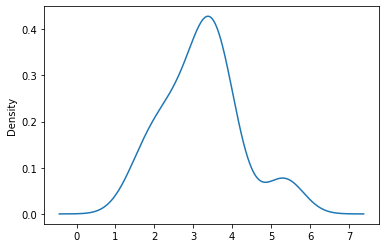

In [41]:
%matplotlib inline
mtcars.wt.plot(kind='kde')

#### 峰态

峰态是对数据分布平峰或者尖峰程度的测量。通常与标准正态分布相比较，即均值为 0，标准差为 1 的分布。如果一组数据服从标准正态分布，那么峰态系数为 0；若峰态系数大于 0，则分布更尖，也意味着数据更为集中；若峰态系数小于 0，则分布更平，数据分布更分散。

由此可以推断，汽车重量的分布峰态应该与 0 接近，可能大于 0，我们计算看看。

In [36]:
mtcars.wt.kurtosis()

0.41659466963492564

那么分散的分布的峰态是怎么样的呢？我们选择 cyl 变量进行计算和可视化。

In [45]:
mtcars.cyl.kurtosis()

-1.7627938970111958

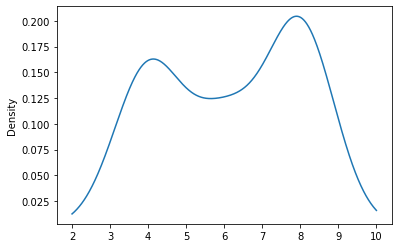

In [46]:
mtcars.cyl.plot(kind='kde')

## 15.2 统计分布

## 15.3 假设检验

https://www.yiibai.com/python_data_science/python_measuring_central_tendency.html